In [63]:



import numpy as np
print(np.__version__)

import pandas as pd
print(pd.__version__)

import seaborn as sns
print(sns.__version__)


import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import QuantileTransformer


1.20.3
1.3.4
0.11.2


# La collecte de données

In [2]:
df = pd.read_csv("EdStatsData.csv")
print(df)
#La taille du dataframe est de 886930x70

       Country Name Country Code  \
0        Arab World          ARB   
1        Arab World          ARB   
2        Arab World          ARB   
3        Arab World          ARB   
4        Arab World          ARB   
...             ...          ...   
886925     Zimbabwe          ZWE   
886926     Zimbabwe          ZWE   
886927     Zimbabwe          ZWE   
886928     Zimbabwe          ZWE   
886929     Zimbabwe          ZWE   

                                           Indicator Name  \
0       Adjusted net enrolment rate, lower secondary, ...   
1       Adjusted net enrolment rate, lower secondary, ...   
2       Adjusted net enrolment rate, lower secondary, ...   
3       Adjusted net enrolment rate, lower secondary, ...   
4       Adjusted net enrolment rate, primary, both sex...   
...                                                   ...   
886925  Youth illiterate population, 15-24 years, male...   
886926  Youth literacy rate, population 15-24 years, b...   
886927  Youth lite

In [3]:
df.describe()

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
count,7.228800e+04,3.553700e+04,3.561900e+04,3.554500e+04,3.573000e+04,8.730600e+04,3.748300e+04,3.757400e+04,3.757600e+04,3.680900e+04,...,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,0.0
mean,1.974772e+09,4.253638e+09,4.592365e+09,5.105006e+09,5.401493e+09,2.314288e+09,5.731808e+09,6.124437e+09,6.671489e+09,7.436724e+09,...,7.224868e+02,7.271290e+02,7.283779e+02,7.266484e+02,7.228327e+02,7.176899e+02,7.113072e+02,7.034274e+02,6.940296e+02,NaN
std,1.211687e+11,1.804814e+11,1.914083e+11,2.059170e+11,2.112150e+11,1.375059e+11,2.215546e+11,2.325489e+11,2.473986e+11,2.660957e+11,...,2.215845e+04,2.287990e+04,2.352338e+04,2.408149e+04,2.455897e+04,2.496587e+04,2.530183e+04,2.556069e+04,2.574189e+04,NaN
min,-1.435564e+00,-1.594625e+00,-3.056522e+00,-4.032582e+00,-4.213563e+00,-3.658569e+00,-2.950945e+00,-3.174870e+00,-3.558749e+00,-2.973612e+00,...,-1.630000e+00,-1.440000e+00,-1.260000e+00,-1.090000e+00,-9.200000e-01,-7.800000e-01,-6.500000e-01,-5.500000e-01,-4.500000e-01,NaN
25%,8.900000e-01,8.853210e+00,9.240920e+00,9.595200e+00,9.861595e+00,1.400000e+00,9.312615e+00,9.519913e+00,1.000000e+01,1.000000e+01,...,3.000000e-02,3.000000e-02,2.000000e-02,2.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,NaN
50%,6.317724e+00,6.316240e+01,6.655139e+01,6.969595e+01,7.087760e+01,9.677420e+00,7.101590e+01,7.133326e+01,7.290512e+01,7.510173e+01,...,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.200000e-01,NaN
75%,6.251250e+01,5.655200e+04,5.863650e+04,6.202900e+04,6.383675e+04,7.854163e+01,5.682800e+04,5.739175e+04,5.940425e+04,6.411500e+04,...,7.505000e+00,7.500000e+00,7.300000e+00,7.100000e+00,6.722500e+00,6.080000e+00,5.462500e+00,4.680000e+00,4.032500e+00,NaN
max,1.903929e+13,1.986457e+13,2.100916e+13,2.238367e+13,2.282991e+13,2.300634e+13,2.424128e+13,2.521383e+13,2.622101e+13,2.730873e+13,...,2.951569e+06,3.070879e+06,3.169711e+06,3.246239e+06,3.301586e+06,3.337871e+06,3.354746e+06,3.351887e+06,3.330484e+06,NaN


<AxesSubplot:>

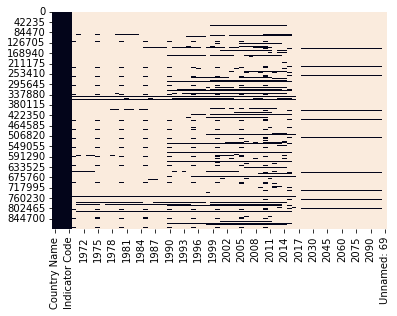

In [4]:
sns.heatmap(df.isnull(), cbar= False)
#On remarque beaucoup de valeurs manquantes sur cette heatmap. Périodicité de certaines données ?

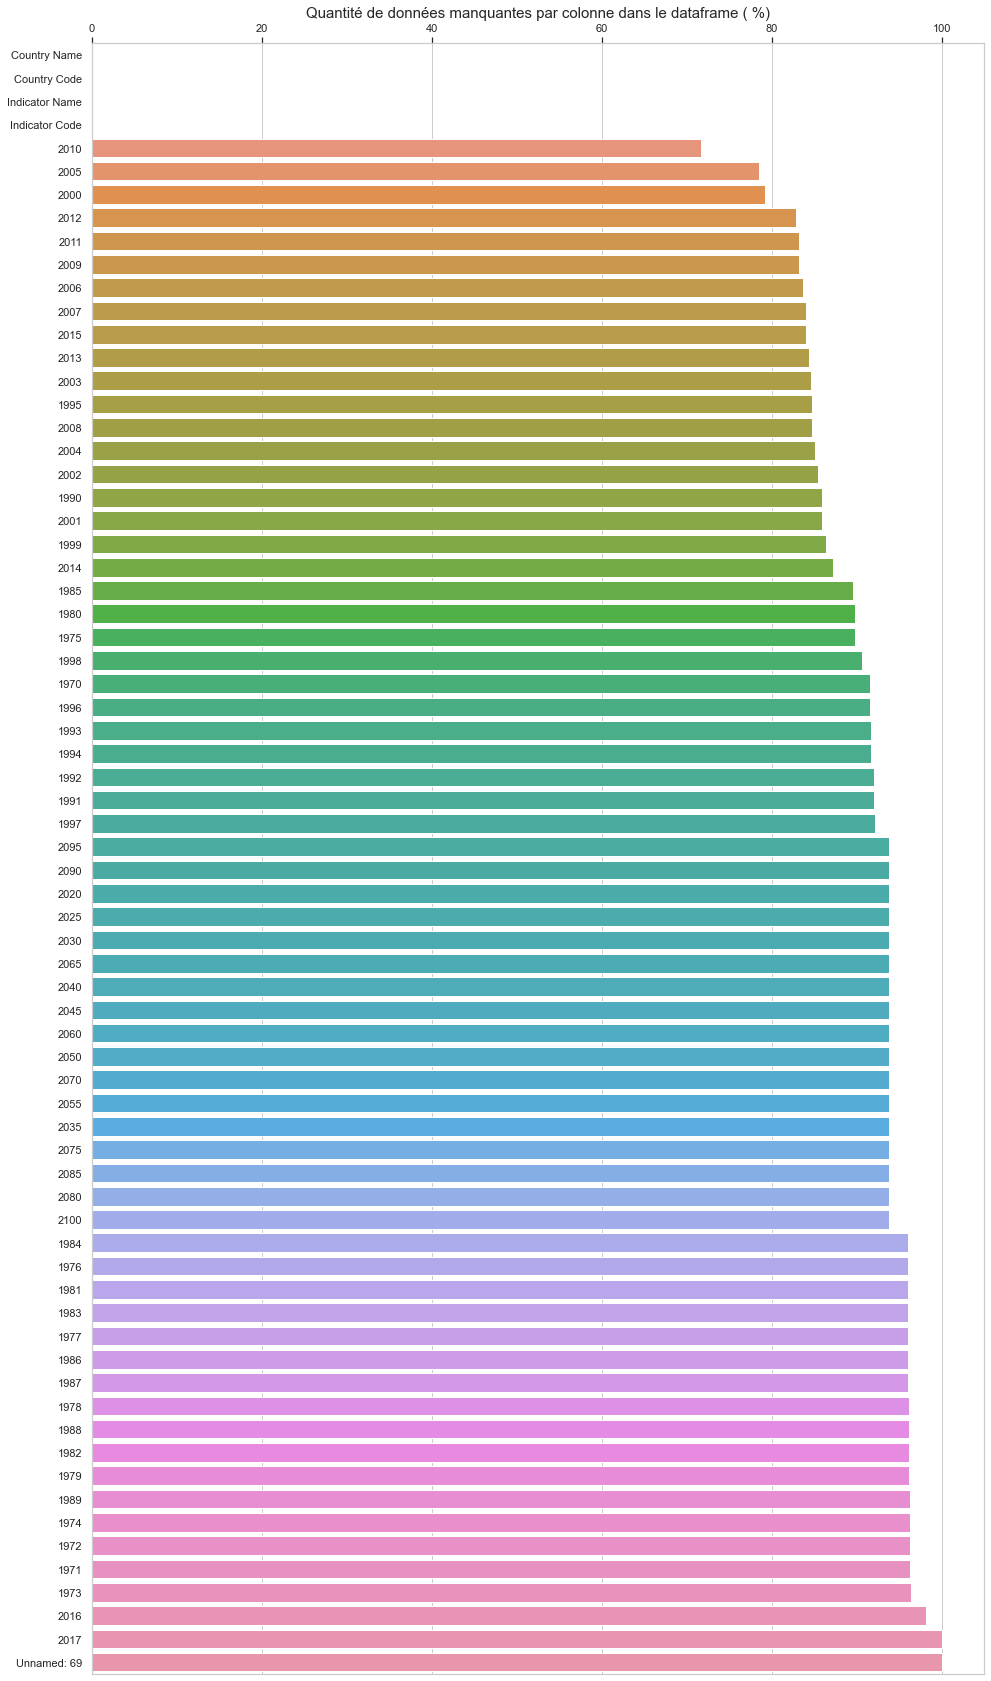

In [65]:
#Visualisation sous forme de diagramme baton des données manquantes par colonne
def proportion_missing_values(dataframe):
        miss = dataframe.isna().sum().divide(dataframe.shape[0]/100).sort_values(ascending=True)
        return miss

sns.set(style="whitegrid")
plt.figure(figsize=(16, 30))
ax = sns.barplot(y = proportion_missing_values(df).index, x=proportion_missing_values(df).values)
ax.xaxis.set_ticks_position('top')
plt.title('Quantité de données manquantes par colonne dans le dataframe ( %)', size=15)
plt.show()

In [6]:
df.isnull().sum(axis=1)
#On regarde ici la quantité de valeurs manquantes pour chaque ligne du DataFrame

0         66
1         66
2         66
3         66
4         21
          ..
886925    62
886926    62
886927    62
886928    62
886929    62
Length: 886930, dtype: int64

# Le nettoyage du jeu de données

In [7]:
#Ici, nous supprimons des lignes qui concernent des zones géographiques et non des pays, ce qui peut poser problème
#pour notre analyse (découvertes bien plus tard dans la démarche, au moment de l'étude de l'indicateur pop).
df = df[~df['Country Code'].isin(['ARB','EAS','EAP','ECA','ECS','EMU','EUU','HPC', 'HIC','LCN','LAC','LDC',
                                  'LMY','LIC','LMC','MEA','MNA', 'MIC','NAC','OED','SAS','SSF','SSA','UMC', 'WLD'])]

# On va également supprimer toutes les entrées concernant les pays pauvres (low income), pour simplifier le traitement
# du jeu de données

df = df[~df['Country Code'].isin(['AFG','BFA','GNQ','SOM','PRK','SSD','BDI','LBR','SDN','CAF','MDG','SYR','TCD','MWI','TGO'
                                 ,'COD','MLI', 'UGA','ERI','ETH','GMB','GIN','MOZ','NER','RWA', 'SLE', 'YEM'])]
# Même chose pour les pays avec un lower-middle income
df = df[~df['Country Code'].isin(['AGO','DZA','BGD','BLZ','BEN','BTN','BOL','CPV','KHM','CMR','COM','COG','CIV','DJI','EGY',
                                 'SLV','GHA','HTI','HND','IRN','KEN','KIR','KGZ','LAO','LSO','MRT','FSM','MNG','MAR','MMR',
                                 'NPL','NIC','NGA','PAK','PNG','PHL','WSM','STP','SEN','SLB','LKA','TZA','TJK','TLS','TUN',
                                 'UKR','UZB','VUT','VNM','PSE','ZMB','ZWE'])]

In [8]:
df.shape

(505770, 70)

In [9]:
# Suppression des lignes qui comportent moins de 6 valeurs non-nulles (10%)
mod_df = df.dropna(axis="rows", thresh=6, subset=None, inplace=False)

In [10]:
mod_df.shape

(188655, 70)

In [11]:
# SUppression des années qui ne nous intéressent pas
mod_df = mod_df.drop(
    [
        "1970",
        "1971",
        "1972",
        "1973",
        "1974",
        "1975",
        "1976",
        "1977",
        "1978",
        "1979",
        "1980",
        "1981",
        "1982",
        "1983",
        "1984",
        "1985",
        "1986",
        "1987",
        "1988",
        "1989",
        "1990",
        "1991",
        "1992",
        "1993",
        "1994",
        "1995",
        "1996",
        "1997",
        "1998",
        "1999",
        "2000",
        "2001",
        "2002",
        "2003",
        "2004",
        "2005",
        "2006",
        "2007",
        "2008",
        "2009",
        "2010",
        "2011",
        "2012",
        "2016",
    ],
    axis=1,
)

In [12]:
mod_df.shape

(188655, 26)

##Création de sous ensembles du dataframe pour chacun des indicateurs qui nous intéressent ; la croissance du nombre d'entrées au Lycée (lyc) ; la croissance du nombre d'entrées dans le supérieur (sup) ; la quantité de personnes dont l'âge est compris entre 15 et 24 ans (age); le PIB par habitant (pib) ainsi que le nombre d'utilisateurs d'internet pour 100 individus (int). Nous ajouterons également la taille de la population (ajoutée à posteriori pour "casser" le score des pays riches, notée pop).

In [13]:
dh_lyc = mod_df[mod_df["Indicator Code"] == str("SE.SEC.ENRR.UP")]
dh_sup = mod_df[mod_df["Indicator Code"] == str("SE.TER.ENRR")]
dh_age = mod_df[mod_df["Indicator Code"] == str("SP.POP.1524.TO.UN")]
dh_pib = mod_df[mod_df["Indicator Code"] == str("NY.GDP.PCAP.KD")]
dh_int = mod_df[mod_df["Indicator Code"] == str("IT.NET.USER.P2")]
dh_pop = mod_df[mod_df["Indicator Code"] == str("SP.POP.TOTL")]

# Suppression des colonnes qui ne comportent que des valeurs nulles
dh_lyc = dh_lyc.dropna(axis="columns", how="all")
dh_sup = dh_sup.dropna(axis="columns", how="all")
dh_age = dh_age.dropna(axis="columns", how="all")
dh_pib = dh_pib.dropna(axis="columns", how="all")
dh_int = dh_int.dropna(axis="columns", how="all")
dh_pop = dh_pop.dropna(axis="columns", how="all")

In [14]:
# Check des doublons dans chaque sous-dataframe:
dh_lyc.loc[dh_lyc["Country Code"].duplicated(keep=False)]
dh_sup.loc[dh_sup["Country Code"].duplicated(keep=False)]
dh_age.loc[dh_age["Country Code"].duplicated(keep=False)]
dh_pib.loc[dh_pib["Country Code"].duplicated(keep=False)]
dh_int.loc[dh_int["Country Code"].duplicated(keep=False)]
dh_pop.loc[dh_pop["Country Code"].duplicated(keep=False)]

# Pas de doublon

,Country Name,Country Code,Indicator Name,Indicator Code,2013,2014,2015


In [15]:
##Suppression pour chaque sous dataframe des lignes qui ne comportent que des valeurs manquantes.

mod_dh_lyc =dh_lyc.dropna( how='all', subset=['2013','2014','2015'])
mod_dh_sup =dh_sup.dropna( how='all', subset=['2013','2014','2015'])
mod_dh_age =dh_age.dropna( how='all', subset=['2013','2014','2015'])
mod_dh_pib =dh_pib.dropna( how='all', subset=['2013','2014','2015'])
mod_dh_int =dh_int.dropna( how='all', subset=['2013','2014','2015'])
mod_dh_pop =dh_pop.dropna( how='all', subset=['2013','2014','2015'])

In [16]:
mod_dh_pib.shape

(122, 7)

##Recherche des potentiels outliers pour chaque indicateur, en utilisant des boîtes à moustaches

In [17]:
#mod_dataframe = []
#for k, df in enumerate([dh_sup, dh_lyc, dh_ord, dh_ill, dh_pib, dh_pop]) :
 #   if k == 4 :
  #      threshold =11
   # else: 
    #    threshold= 16
    #mod_dataframe.append(df.dropna(axis=0, how='any', thresh= threshold))
#mod_dh_sup, mod_dh_lyc, mod_dh_ord, mod_dh_ill, mod_dh_pib, mod_dh_pop = mod_dataframe[:]

In [18]:
mod_dh_sup

,Country Name,Country Code,Indicator Name,Indicator Code,2013,2014,2015
96629,Albania,ALB,"Gross enrolment ratio, tertiary, both sexes (%)",SE.TER.ENRR,62.547760,62.706848,58.109951
118619,Argentina,ARG,"Gross enrolment ratio, tertiary, both sexes (%)",SE.TER.ENRR,79.986702,82.917389,NaN
122284,Armenia,ARM,"Gross enrolment ratio, tertiary, both sexes (%)",SE.TER.ENRR,43.310902,44.254608,44.309502
125949,Aruba,ABW,"Gross enrolment ratio, tertiary, both sexes (%)",SE.TER.ENRR,16.195829,16.405420,15.273780
129614,Australia,AUS,"Gross enrolment ratio, tertiary, both sexes (%)",SE.TER.ENRR,86.554550,90.306503,NaN
...,...,...,...,...,...,...,...
818634,Turkey,TUR,"Gross enrolment ratio, tertiary, both sexes (%)",SE.TER.ENRR,78.981949,86.309013,94.732300
822299,Turkmenistan,TKM,"Gross enrolment ratio, tertiary, both sexes (%)",SE.TER.ENRR,NaN,7.984440,NaN
844289,United Kingdom,GBR,"Gross enrolment ratio, tertiary, both sexes (%)",SE.TER.ENRR,56.870129,56.476768,NaN
847954,United States,USA,"Gross enrolment ratio, tertiary, both sexes (%)",SE.TER.ENRR,88.808571,86.663963,85.795776


In [19]:
mod_dh_sup2 = mod_dh_sup.select_dtypes(exclude=["object"])
mod_dh_lyc2 = mod_dh_lyc.select_dtypes(exclude=["object"])
mod_dh_pib2 = mod_dh_pib.select_dtypes(exclude=["object"])
mod_dh_int2 = mod_dh_int.select_dtypes(exclude=["object"])
mod_dh_age2 = mod_dh_age.select_dtypes(exclude=["object"])
mod_dh_pop2 = mod_dh_pop.select_dtypes(exclude=["object"])
#Je modifie ici mes sousdataframes pour pouvoir boucler sur les colonnes

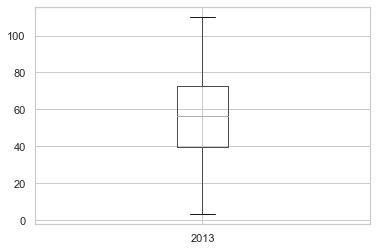

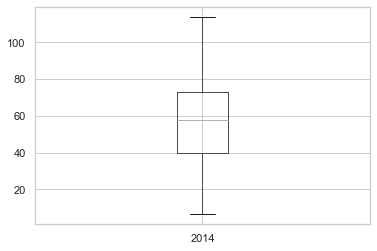

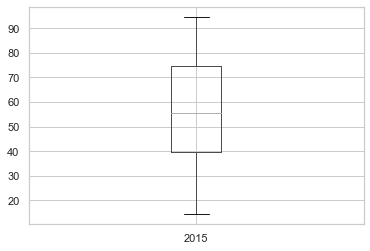

In [20]:
for column in mod_dh_sup2:
    plt.figure()
    mod_dh_sup2.boxplot([column])
# Pas d'outlier (avant imputation par la médiane)

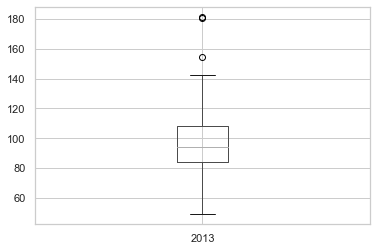

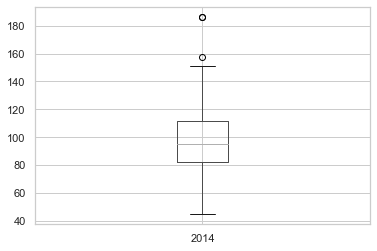

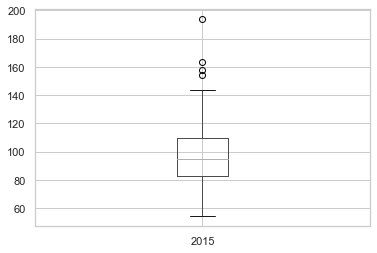

In [21]:
for column in mod_dh_lyc2:
    plt.figure()
    mod_dh_lyc2.boxplot([column])
#Ici les outliers sont l'Australie, Belgique, Finlande, Danemark et la Suède, ce qui est atypique (mais pas aberrant)

In [22]:
mod_dh_lyc.loc[mod_dh_lyc['2013'] >= 140]

,Country Name,Country Code,Indicator Name,Indicator Code,2013,2014,2015
129618,Australia,AUS,"Gross enrolment ratio, upper secondary, both s...",SE.SEC.ENRR.UP,180.813995,186.427887,NaN
158938,Belgium,BEL,"Gross enrolment ratio, upper secondary, both s...",SE.SEC.ENRR.UP,154.740646,157.230682,158.077530
287213,Denmark,DNK,"Gross enrolment ratio, upper secondary, both s...",SE.SEC.ENRR.UP,142.373962,142.486664,143.508377
334858,Finland,FIN,"Gross enrolment ratio, upper secondary, both s...",SE.SEC.ENRR.UP,181.605743,186.112473,194.101990
778323,Sweden,SWE,"Gross enrolment ratio, upper secondary, both s...",SE.SEC.ENRR.UP,141.753723,148.578979,163.634064


In [23]:
mod_dh_age

,Country Name,Country Code,Indicator Name,Indicator Code,2013,2014,2015
97772,Albania,ALB,"Population, ages 15-24, total",SP.POP.1524.TO.UN,582411.0,569427.0,556269.0
119762,Argentina,ARG,"Population, ages 15-24, total",SP.POP.1524.TO.UN,6892160.0,6894149.0,6886530.0
123427,Armenia,ARM,"Population, ages 15-24, total",SP.POP.1524.TO.UN,502418.0,474381.0,446958.0
127092,Aruba,ABW,"Population, ages 15-24, total",SP.POP.1524.TO.UN,13990.0,14253.0,14455.0
130757,Australia,AUS,"Population, ages 15-24, total",SP.POP.1524.TO.UN,2926254.0,2922207.0,2914620.0
...,...,...,...,...,...,...,...
841767,United Arab Emirates,ARE,"Population, ages 15-24, total",SP.POP.1524.TO.UN,719641.0,733259.0,743608.0
845432,United Kingdom,GBR,"Population, ages 15-24, total",SP.POP.1524.TO.UN,7888589.0,7812258.0,7731522.0
849097,United States,USA,"Population, ages 15-24, total",SP.POP.1524.TO.UN,45307415.0,45230846.0,45147517.0
852762,Uruguay,URY,"Population, ages 15-24, total",SP.POP.1524.TO.UN,520793.0,520399.0,519298.0


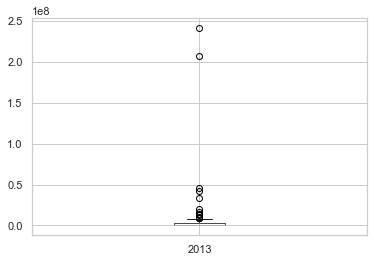

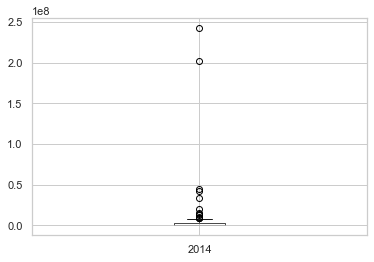

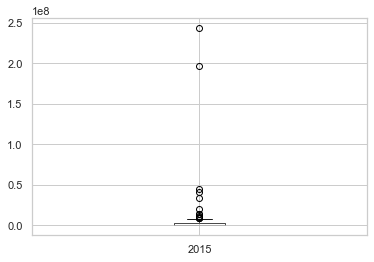

In [24]:
for column in mod_dh_age2:
    plt.figure()
    mod_dh_age2.boxplot([column])
#Beaucoup d'outliers, mais rien d'atypique

In [25]:
mod_dh_age.loc[mod_dh_age['2015'] >= 0.1*(10**8)]

,Country Name,Country Code,Indicator Name,Indicator Code,2013,2014,2015
189397,Brazil,BRA,"Population, ages 15-24, total",SP.POP.1524.TO.UN,33412052.0,33469835.0,33595574.0
244372,China,CHN,"Population, ages 15-24, total",SP.POP.1524.TO.UN,206846521.0,201802535.0,197026759.0
416627,India,IND,"Population, ages 15-24, total",SP.POP.1524.TO.UN,241535030.0,243002731.0,244120201.0
420292,Indonesia,IDN,"Population, ages 15-24, total",SP.POP.1524.TO.UN,41865701.0,41821108.0,41819264.0
449612,Japan,JPN,"Population, ages 15-24, total",SP.POP.1524.TO.UN,12272803.0,12211081.0,12157426.0
559562,Mexico,MEX,"Population, ages 15-24, total",SP.POP.1524.TO.UN,20271973.0,20325060.0,20336734.0
680507,Russian Federation,RUS,"Population, ages 15-24, total",SP.POP.1524.TO.UN,16560947.0,15504104.0,14661984.0
819777,Turkey,TUR,"Population, ages 15-24, total",SP.POP.1524.TO.UN,13859026.0,13913334.0,13930222.0
849097,United States,USA,"Population, ages 15-24, total",SP.POP.1524.TO.UN,45307415.0,45230846.0,45147517.0


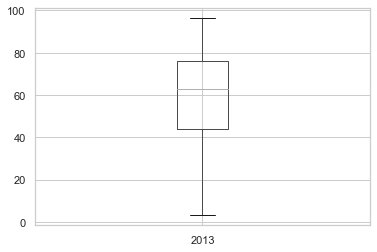

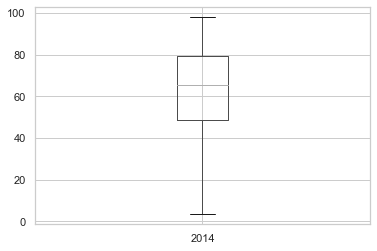

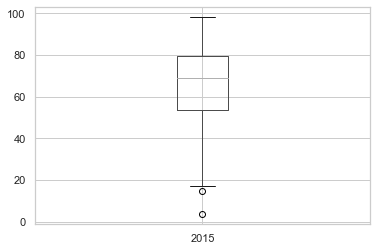

In [26]:
for column in mod_dh_int2:
    plt.figure()
    mod_dh_int2.boxplot([column])
#Outliers en 2015 : Guinea-Bissau / Iraq / Turkmenistan, atypiques

In [27]:
mod_dh_int.loc[mod_dh_int['2015'] <= 19]

,Country Name,Country Code,Indicator Name,Indicator Code,2013,2014,2015
389865,Guinea-Bissau,GNB,Internet users (per 100 people),IT.NET.USER.P2,3.1,3.32,3.540707
426515,Iraq,IRQ,Internet users (per 100 people),IT.NET.USER.P2,9.2,13.21,17.220000
822335,Turkmenistan,TKM,Internet users (per 100 people),IT.NET.USER.P2,9.6,12.20,14.996775


In [28]:
mod_dh_pop

,Country Name,Country Code,Indicator Name,Indicator Code,2013,2014,2015
97823,Albania,ALB,"Population, total",SP.POP.TOTL,2895092.0,2889104.0,2880703.0
105153,American Samoa,ASM,"Population, total",SP.POP.TOTL,55307.0,55437.0,55537.0
108818,Andorra,AND,"Population, total",SP.POP.TOTL,80788.0,79223.0,78014.0
116148,Antigua and Barbuda,ATG,"Population, total",SP.POP.TOTL,97824.0,98875.0,99923.0
119813,Argentina,ARG,"Population, total",SP.POP.TOTL,42539925.0,42981515.0,43417765.0
...,...,...,...,...,...,...,...
845483,United Kingdom,GBR,"Population, total",SP.POP.TOTL,64128226.0,64613160.0,65128861.0
849148,United States,USA,"Population, total",SP.POP.TOTL,316204908.0,318563456.0,320896618.0
852813,Uruguay,URY,"Population, total",SP.POP.TOTL,3408005.0,3419546.0,3431552.0
863808,"Venezuela, RB",VEN,"Population, total",SP.POP.TOTL,30317848.0,30738378.0,31155134.0


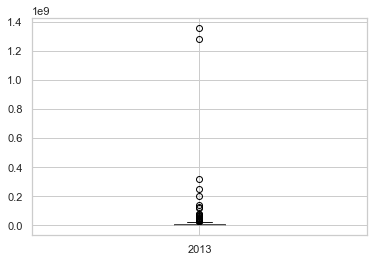

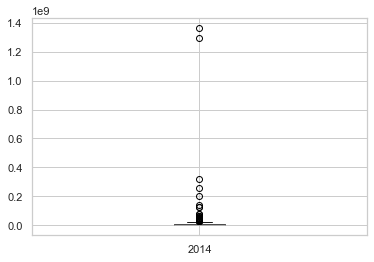

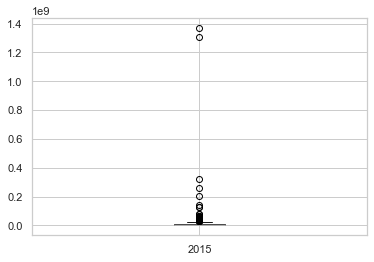

In [29]:
for column in mod_dh_pop2:
    plt.figure()
    mod_dh_pop2.boxplot([column])
#Beaucoup d'outliers qui sont enfait des zones géographiques et non des pays, que nous avons décidé de
#supprimer au début du notebook.


In [30]:
mod_dh_pop.loc[mod_dh_pop['2015'] >= 0.1*(10**9)]

,Country Name,Country Code,Indicator Name,Indicator Code,2013,2014,2015
189448,Brazil,BRA,"Population, total",SP.POP.TOTL,2.024086e+08,2.042131e+08,2.059621e+08
244423,China,CHN,"Population, total",SP.POP.TOTL,1.357380e+09,1.364270e+09,1.371220e+09
416678,India,IND,"Population, total",SP.POP.TOTL,1.278562e+09,1.293859e+09,1.309054e+09
420343,Indonesia,IDN,"Population, total",SP.POP.TOTL,2.520323e+08,2.551311e+08,2.581621e+08
449663,Japan,JPN,"Population, total",SP.POP.TOTL,1.274450e+08,1.272760e+08,1.271410e+08
559613,Mexico,MEX,"Population, total",SP.POP.TOTL,1.225360e+08,1.242216e+08,1.258909e+08
680558,Russian Federation,RUS,"Population, total",SP.POP.TOTL,1.435069e+08,1.438197e+08,1.440969e+08
849148,United States,USA,"Population, total",SP.POP.TOTL,3.162049e+08,3.185635e+08,3.208966e+08


##Imputation par les méthodes ForwardFill / BackwardFill des valeurs manquantes pour les indicateurs

In [31]:
mod_dh_lyc

,Country Name,Country Code,Indicator Name,Indicator Code,2013,2014,2015
96633,Albania,ALB,"Gross enrolment ratio, upper secondary, both s...",SE.SEC.ENRR.UP,93.003021,93.927422,89.460274
114958,Antigua and Barbuda,ATG,"Gross enrolment ratio, upper secondary, both s...",SE.SEC.ENRR.UP,NaN,82.103607,82.024597
118623,Argentina,ARG,"Gross enrolment ratio, upper secondary, both s...",SE.SEC.ENRR.UP,83.847839,85.232620,NaN
122288,Armenia,ARM,"Gross enrolment ratio, upper secondary, both s...",SE.SEC.ENRR.UP,83.753754,88.147781,89.926964
129618,Australia,AUS,"Gross enrolment ratio, upper secondary, both s...",SE.SEC.ENRR.UP,180.813995,186.427887,NaN
...,...,...,...,...,...,...,...
829633,Tuvalu,TUV,"Gross enrolment ratio, upper secondary, both s...",SE.SEC.ENRR.UP,NaN,55.678230,NaN
844293,United Kingdom,GBR,"Gross enrolment ratio, upper secondary, both s...",SE.SEC.ENRR.UP,133.473145,138.235916,NaN
847958,United States,USA,"Gross enrolment ratio, upper secondary, both s...",SE.SEC.ENRR.UP,90.668663,93.286598,NaN
851623,Uruguay,URY,"Gross enrolment ratio, upper secondary, both s...",SE.SEC.ENRR.UP,99.427811,80.906548,NaN


In [32]:
mod_dh_int=mod_dh_int.bfill(axis =1)
mod_dh_lyc=mod_dh_lyc.bfill(axis =1)
mod_dh_sup=mod_dh_sup.bfill(axis =1)
mod_dh_pib=mod_dh_pib.bfill(axis =1)
mod_dh_age=mod_dh_age.bfill(axis =1)
mod_dh_pop=mod_dh_pop.bfill(axis =1)




mod_dh_int=mod_dh_int.ffill(axis =1)
mod_dh_lyc=mod_dh_lyc.ffill(axis =1)
mod_dh_sup=mod_dh_sup.ffill(axis =1)
mod_dh_pib=mod_dh_pib.ffill(axis =1)
mod_dh_age=mod_dh_age.ffill(axis =1)
mod_dh_pop=mod_dh_pop.ffill(axis =1)

#Nos jeux de données sont désormais complets et interprétables

In [33]:
mod_dh_lyc.head(60
               )

,Country Name,Country Code,Indicator Name,Indicator Code,2013,2014,2015
96633,Albania,ALB,"Gross enrolment ratio, upper secondary, both s...",SE.SEC.ENRR.UP,93.003021,93.927422,89.460274
114958,Antigua and Barbuda,ATG,"Gross enrolment ratio, upper secondary, both s...",SE.SEC.ENRR.UP,82.103607,82.103607,82.024597
118623,Argentina,ARG,"Gross enrolment ratio, upper secondary, both s...",SE.SEC.ENRR.UP,83.847839,85.232620,85.232620
122288,Armenia,ARM,"Gross enrolment ratio, upper secondary, both s...",SE.SEC.ENRR.UP,83.753754,88.147781,89.926964
129618,Australia,AUS,"Gross enrolment ratio, upper secondary, both s...",SE.SEC.ENRR.UP,180.813995,186.427887,186.427887
133283,Austria,AUT,"Gross enrolment ratio, upper secondary, both s...",SE.SEC.ENRR.UP,98.682854,99.129738,99.619698
144278,Bahrain,BHR,"Gross enrolment ratio, upper secondary, both s...",SE.SEC.ENRR.UP,95.656937,97.559898,102.816643
151608,Barbados,BRB,"Gross enrolment ratio, upper secondary, both s...",SE.SEC.ENRR.UP,112.885910,112.885910,112.885910
155273,Belarus,BLR,"Gross enrolment ratio, upper secondary, both s...",SE.SEC.ENRR.UP,109.357552,113.157600,119.316940
158938,Belgium,BEL,"Gross enrolment ratio, upper secondary, both s...",SE.SEC.ENRR.UP,154.740646,157.230682,158.077530


# Analyse exploratoire, compréhension du jeu de données

L'idée globale ici est de proposer un score par indicateur par pays puis de faire une moyenne de ces scores pour obtenir un score total par pays.

##Création d'une colonne 'mean' : Calcul de la moyenne par pays de chaque indicateur sur les années qui nous
intéressent (traitement sur les lignes)

In [34]:
mod_dh_lyc["mean"] = mod_dh_lyc.iloc[:, 4:6].mean(axis=1)
print(mod_dh_lyc["mean"])
mean_lyc = mod_dh_lyc["mean"].mean()
print(mean_lyc)

mod_dh_sup["mean"] = mod_dh_sup.iloc[:, 4:6].mean(axis=1)
print(mod_dh_sup["mean"])
mean_sup = mod_dh_sup["mean"].mean()
print(mean_sup)

mod_dh_pib["mean"] = mod_dh_pib.iloc[:, 4:6].mean(axis=1)
print(mod_dh_pib["mean"])
mean_pib = mod_dh_pib["mean"].mean()
print(mean_pib)

mod_dh_int["mean"] = mod_dh_int.iloc[:, 4:6].mean(axis=1)
print(mod_dh_int["mean"])
mean_int = mod_dh_int["mean"].mean()
print(mean_int)

mod_dh_age["mean"] = mod_dh_age.iloc[:, 4:6].mean(axis=1)
print(mod_dh_age["mean"])
mean_age = mod_dh_age["mean"].mean()
print(mean_age)

mod_dh_pop["mean"] = mod_dh_pop.iloc[:, 4:6].mean(axis=1)
mean_pop = mod_dh_pop["mean"].mean()

96633      93.465221
114958     82.103607
118623     84.540230
122288     85.950768
129618    183.620941
             ...    
829633     55.678230
844293    135.854530
847958     91.977631
851623     90.167179
862618     81.911537
Name: mean, Length: 98, dtype: float64
97.0292326284915
96629     62.627304
118619    81.452045
122284    43.782755
125949    16.300625
129614    88.430527
            ...    
818634    82.645481
822299     7.984440
844289    56.673449
847954    87.736267
851619    55.733730
Name: mean, Length: 89, dtype: float64
54.56839698754
96534      4370.603050
103864     9745.498102
107529    39944.675539
114859    12165.873343
118524    10511.202328
              ...     
844194    40452.623879
847859    50379.574731
851524    13662.066512
862519    14085.671462
869849    30393.286060
Name: mean, Length: 122, dtype: float64
22118.17260393508
96665     58.650000
107660    94.950000
114990    65.590000
118655    62.300000
122320    48.261403
            ...    
844325  

In [35]:
mod_dh_sup.head()

,Country Name,Country Code,Indicator Name,Indicator Code,2013,2014,2015,mean
96629,Albania,ALB,"Gross enrolment ratio, tertiary, both sexes (%)",SE.TER.ENRR,62.547760,62.706848,58.109951,62.627304
118619,Argentina,ARG,"Gross enrolment ratio, tertiary, both sexes (%)",SE.TER.ENRR,79.986702,82.917389,82.917389,81.452045
122284,Armenia,ARM,"Gross enrolment ratio, tertiary, both sexes (%)",SE.TER.ENRR,43.310902,44.254608,44.309502,43.782755
125949,Aruba,ABW,"Gross enrolment ratio, tertiary, both sexes (%)",SE.TER.ENRR,16.195829,16.405420,15.273780,16.300625
129614,Australia,AUS,"Gross enrolment ratio, tertiary, both sexes (%)",SE.TER.ENRR,86.554550,90.306503,90.306503,88.430527


On utilise un système de centrage/réduction pour obtenir ce fameux score par indicateur, je l'ai codé à la main dans un premier temps (cf notebook non cléané), mais sklearn permet de faire ça de manière optimale

In [36]:
qtransform = QuantileTransformer()
scaler = StandardScaler()
mod_dh_lyc["Score Lyc"] = scaler.fit_transform(mod_dh_lyc[["mean"]])
mod_dh_sup["Score Sup"] = scaler.fit_transform(mod_dh_sup[["mean"]])
mod_dh_int["Score Int"] = scaler.fit_transform(mod_dh_int[["mean"]])
mod_dh_pop["Score Pop"] = qtransform.fit_transform(mod_dh_pop[["mean"]])
mod_dh_age["Score Age"] = qtransform.fit_transform(mod_dh_age[["mean"]])
mod_dh_pib["Score PIB"] = scaler.fit_transform(mod_dh_pib[["mean"]])

C:\Users\alexa\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (136). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
C:\Users\alexa\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (104). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


Visualisation du Top10 des pays pour chacun des indicateurs

<AxesSubplot:xlabel='Country Name'>

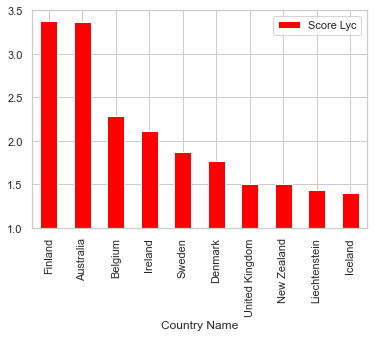

In [37]:
#Classement Lyc
mod_dh_lyc.sort_values(by=["Score Lyc"], ascending=False, inplace=True)
mod_dh_lyc.head(10).plot.bar(x= 'Country Name', y='Score Lyc', ylim=(1, 3.5), color='red')

<AxesSubplot:xlabel='Country Name'>

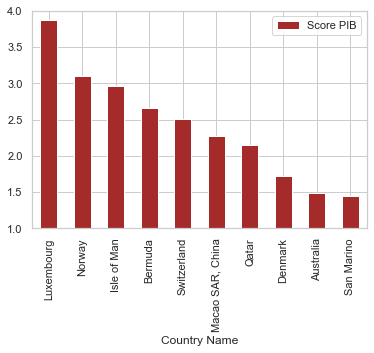

In [38]:
#Classement PIB
mod_dh_pib.sort_values(by=["Score PIB"], ascending=False, inplace=True)
mod_dh_pib.head(10).plot.bar(x= 'Country Name', y='Score PIB', ylim=(1, 4), color='brown')

<AxesSubplot:xlabel='Country Name'>

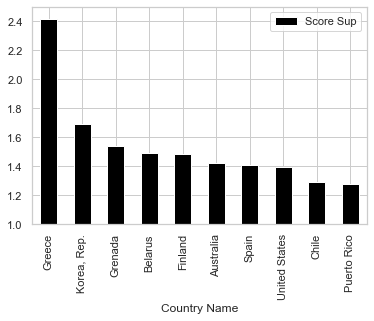

In [39]:
#Classement Sup
mod_dh_sup.sort_values(by=["Score Sup"], ascending=False, inplace=True)
mod_dh_sup.head(10).plot.bar(x= 'Country Name', y='Score Sup', ylim=(1.0, 2.5), color='black')

<AxesSubplot:xlabel='Country Name'>

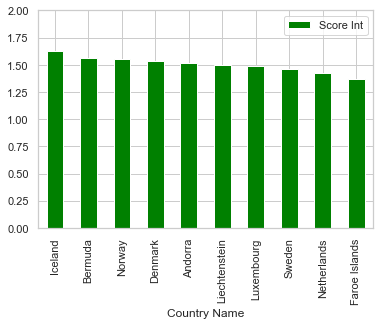

In [40]:
#Classement Int
mod_dh_int.sort_values(by=["Score Int"], ascending=False, inplace=True)
mod_dh_int.head(10).plot.bar(x= 'Country Name', y='Score Int', ylim=(0, 2), color='green')

<AxesSubplot:xlabel='Country Name'>

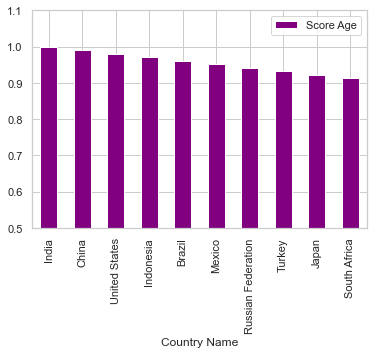

In [41]:
#Classement Age
mod_dh_age.sort_values(by=["Score Age"], ascending=False, inplace=True)
mod_dh_age.head(10).plot.bar(x= 'Country Name', y='Score Age', ylim=(0.5, 1.1), color='purple')

<AxesSubplot:xlabel='Country Name'>

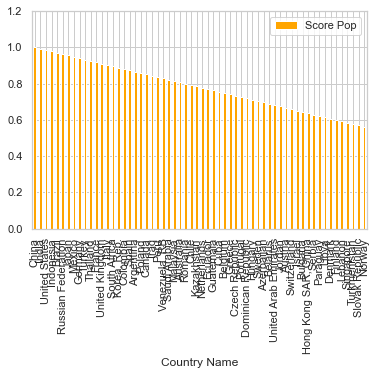

In [42]:
#Classement Pop
mod_dh_pop.sort_values(by=["Score Pop"], ascending=False, inplace=True)
mod_dh_pop.head(60).plot.bar(x= 'Country Name', y='Score Pop', ylim=(0, 1.2), color='orange')

# Réponse à la problématique

Nous allons désormais effectuer un merge de chacun de nos sous dataframes pour pouvoir calculer le score total de chacun des pays et d'effectuer un ranking final pour répondre à la problématique

In [43]:
dm = pd.merge(
    pd.merge(
        mod_dh_sup[["Country Name", "Country Code", "Score Sup"]],
        mod_dh_lyc[["Country Code", "Score Lyc"]],
        on="Country Code",
    ),
    mod_dh_int[["Country Code", "Score Int"]],
    on="Country Code",
)

dp = pd.merge(dm, mod_dh_age[["Country Code", "Score Age"]],
    on="Country Code",
)
dq = pd.merge(dp, mod_dh_pib[["Country Code", "Score PIB"]],
    on="Country Code",
)

In [44]:
dq.head(20)

,Country Name,Country Code,Score Sup,Score Lyc,Score Int,Score Age,Score PIB
0,Greece,GRC,2.417457,0.580909,0.010779,0.572816,0.013496
1,"Korea, Rep.",KOR,1.692019,-0.129998,1.121023,0.834951,0.087698
2,Grenada,GRD,1.539265,-0.022374,-0.811499,0.029126,-0.671390
3,Belarus,BLR,1.488586,0.552904,-0.212086,0.592233,-0.720972
4,Finland,FIN,1.485442,3.374152,1.249922,0.436893,1.086014
5,Australia,AUS,1.424924,3.364897,1.011165,0.737864,1.486717
6,Spain,ESP,1.409709,1.345837,0.568684,0.757282,0.331673
7,United States,USA,1.395710,-0.196302,0.491475,0.980583,1.313919
8,Chile,CHL,1.289975,0.071171,-0.078633,0.728155,-0.348300
9,Slovenia,SVN,1.241607,0.856695,0.488445,0.194175,0.036328


In [45]:
dq.shape

(74, 7)

In [46]:
# Calcul du nouveau score total et création d'une colonne à cet effet
dq["Nouveau Score Total"] = dq[["Score Sup", "Score Lyc", "Score Int","Score Age", "Score PIB"]].mean(axis=1)

<AxesSubplot:xlabel='Country Name'>

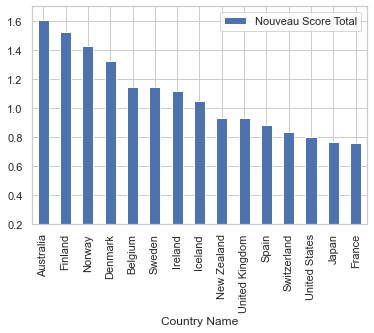

In [47]:
#Affichage du classement sous la forme d'un diagramme à bâtons
dq.sort_values(by=["Nouveau Score Total"], ascending=False, inplace=True)
dq.head(15).plot.bar(x= 'Country Name', y='Nouveau Score Total', ylim=(0.2, 1.7))

# Pour aller plus loin

On pourrait essayer de regarder la corrélation des indicateurs, pour essayer de voir des liens entre les indicateurs

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Score Lyc', ylabel='Score Age'>

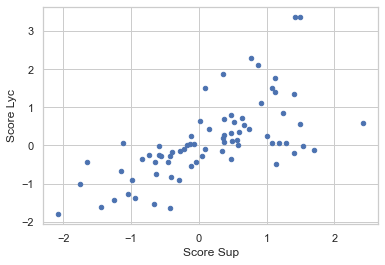

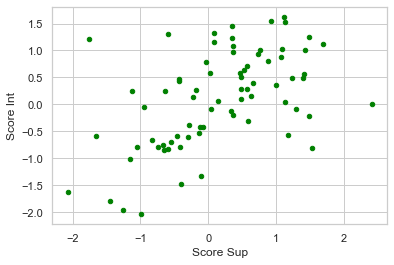

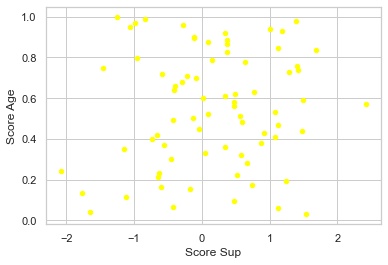

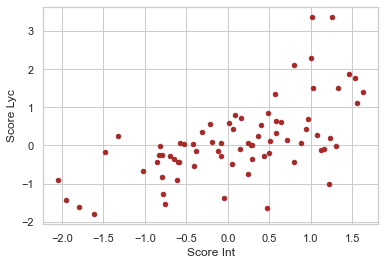

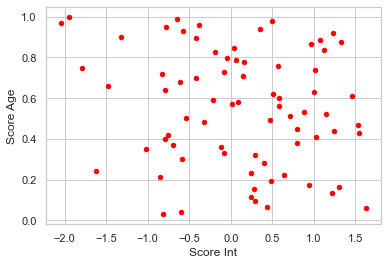

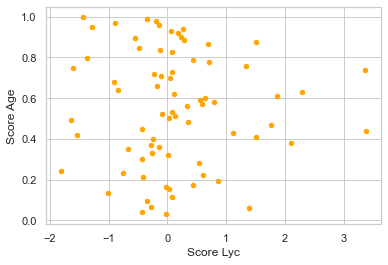

In [48]:
#Contrôle de la corrélation des indicateurs.

dq.plot.scatter(x="Score Sup", y = "Score Lyc")

dq.plot.scatter(x="Score Sup", y = "Score Int", color='green')

dq.plot.scatter(x="Score Sup", y = "Score Age", color='yellow')

dq.plot.scatter(x="Score Int", y = "Score Lyc", color='brown')

dq.plot.scatter(x="Score Int", y = "Score Age", color='red')

dq.plot.scatter(x="Score Lyc", y = "Score Age", color='orange')

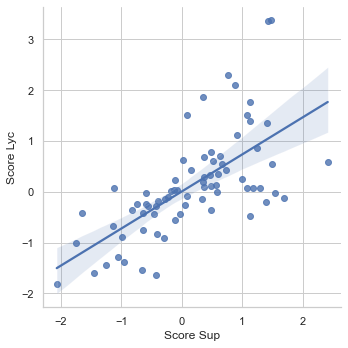

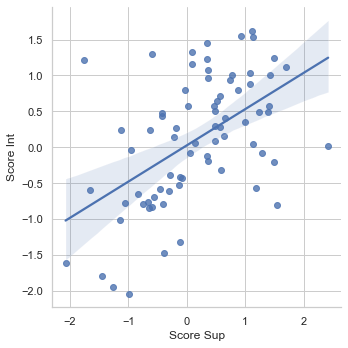

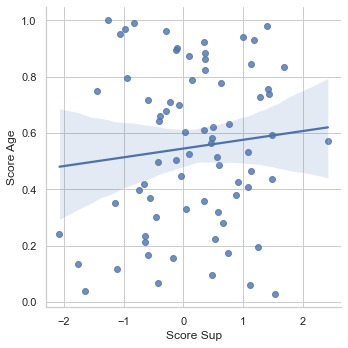

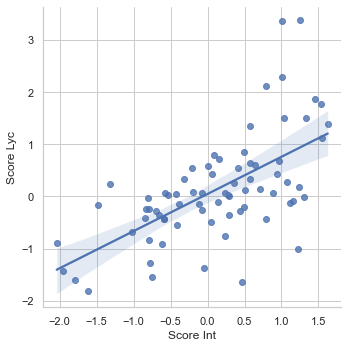

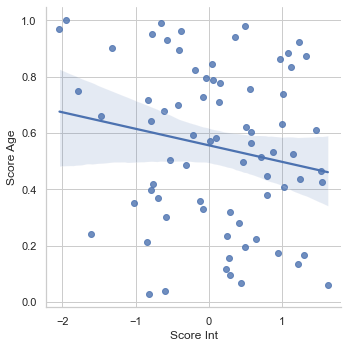

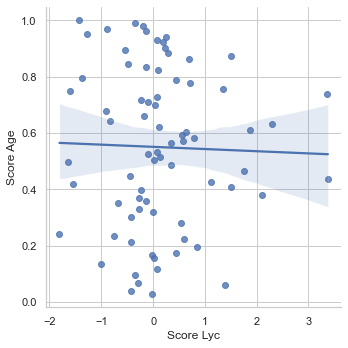

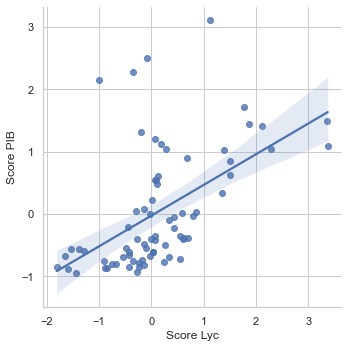

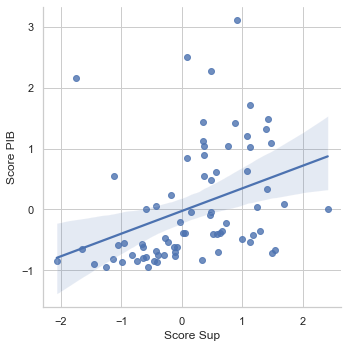

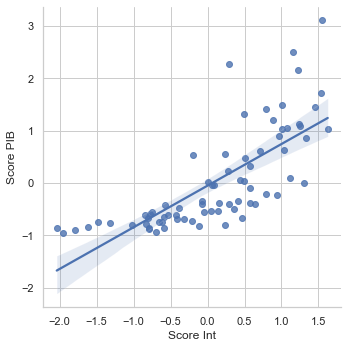

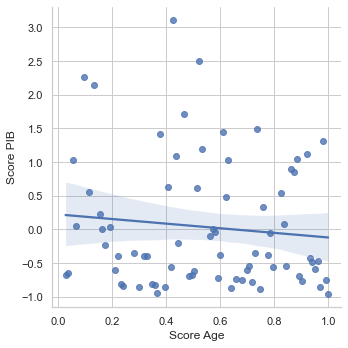

In [49]:
sns.lmplot(x='Score Sup', y='Score Lyc', data=dq)
sns.lmplot(x='Score Sup', y='Score Int', data=dq)
sns.lmplot(x='Score Sup', y='Score Age', data=dq)
sns.lmplot(x='Score Int', y='Score Lyc', data=dq)
sns.lmplot(x='Score Int', y='Score Age', data=dq)
sns.lmplot(x='Score Lyc', y='Score Age', data=dq)
sns.lmplot(x='Score Lyc', y='Score PIB', data=dq)
sns.lmplot(x='Score Sup', y='Score PIB', data=dq)
sns.lmplot(x='Score Int', y='Score PIB', data=dq)
sns.lmplot(x='Score Age', y='Score PIB', data=dq)

## Pour chacun des pays les mieux rankés, on effectue une prédiction sur l'évolution du nombre de potentiels clients, en plottant l'indicateur age en fonction des années par pays.

In [50]:
mod_dh_age.head(10)

,Country Name,Country Code,Indicator Name,Indicator Code,2013,2014,2015,mean,Score Age
416627,India,IND,"Population, ages 15-24, total",SP.POP.1524.TO.UN,241535030.0,243002731.0,244120201.0,242268880.5,1.000000
244372,China,CHN,"Population, ages 15-24, total",SP.POP.1524.TO.UN,206846521.0,201802535.0,197026759.0,204324528.0,0.990291
849097,United States,USA,"Population, ages 15-24, total",SP.POP.1524.TO.UN,45307415.0,45230846.0,45147517.0,45269130.5,0.980583
420292,Indonesia,IDN,"Population, ages 15-24, total",SP.POP.1524.TO.UN,41865701.0,41821108.0,41819264.0,41843404.5,0.970874
189397,Brazil,BRA,"Population, ages 15-24, total",SP.POP.1524.TO.UN,33412052.0,33469835.0,33595574.0,33440943.5,0.961165
559562,Mexico,MEX,"Population, ages 15-24, total",SP.POP.1524.TO.UN,20271973.0,20325060.0,20336734.0,20298516.5,0.951456
680507,Russian Federation,RUS,"Population, ages 15-24, total",SP.POP.1524.TO.UN,16560947.0,15504104.0,14661984.0,16032525.5,0.941748
819777,Turkey,TUR,"Population, ages 15-24, total",SP.POP.1524.TO.UN,13859026.0,13913334.0,13930222.0,13886180.0,0.932039
449612,Japan,JPN,"Population, ages 15-24, total",SP.POP.1524.TO.UN,12272803.0,12211081.0,12157426.0,12241942.0,0.922330
739147,South Africa,ZAF,"Population, ages 15-24, total",SP.POP.1524.TO.UN,9925487.0,9965374.0,9998431.0,9945430.5,0.912621


## On reprend le jeu de données de départ pour plotter toutes les valeurs de pop15-24 pour chacun des pays du top 10

In [51]:
df2 = df[df["Indicator Code"] == str("SP.POP.1524.TO.UN")]
df2 = df2.filter(['Country Name','2005','2006','2007','2008','2009','2010',
                  '2011','2012', '2013', '2014', '2015'])

In [52]:
row_aus = df2.loc[df2['Country Name'] == 'Australia']
row_fin = df2.loc[df2['Country Name'] == 'Finland']
row_nor = df2.loc[df2['Country Name'] == 'Norway']
row_den = df2.loc[df2['Country Name'] == 'Denmark']
row_bel = df2.loc[df2['Country Name'] == 'Belgium']
row_swe = df2.loc[df2['Country Name'] == 'Sweden']
row_ire = df2.loc[df2['Country Name'] == 'Ireland']
row_ice = df2.loc[df2['Country Name'] == 'Iceland']
row_nze = df2.loc[df2['Country Name'] == 'New Zealand']
row_unk = df2.loc[df2['Country Name'] == 'United Kingdom']

In [53]:
row_aus.loc[130757, ['2005','2006','2007','2008','2009','2010',
                  '2011','2012', '2013', '2014', '2015']] 

2005    2808725.0
2006    2841117.0
2007    2867125.0
2008    2887147.0
2009    2902536.0
2010    2914315.0
2011    2922445.0
2012    2926388.0
2013    2926254.0
2014    2922207.0
2015    2914620.0
Name: 130757, dtype: object

In [54]:
def formatage(x):
    x.T.reset_index()
    f_x = x.T.reset_index().loc[1:]
    f_x.columns = ['year' ,'value']
    f_x['year'] = f_x['year'].apply(int)
    f_x['value'] = f_x['value'].apply(int)
    return f_x

In [55]:
formatage(row_fin)

,year,value
1,2005,653396
2,2006,653350
3,2007,654246
4,2008,655543
5,2009,656406
6,2010,656220
7,2011,654995
8,2012,652917
9,2013,649758
10,2014,645278


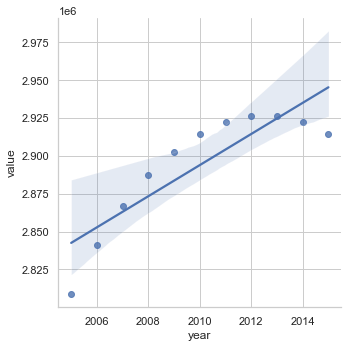

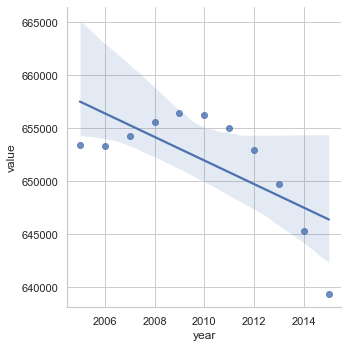

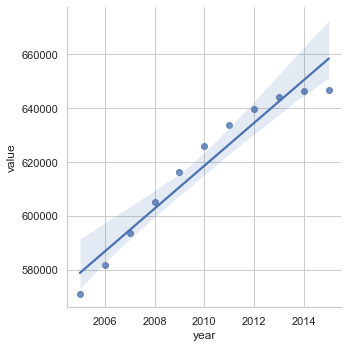

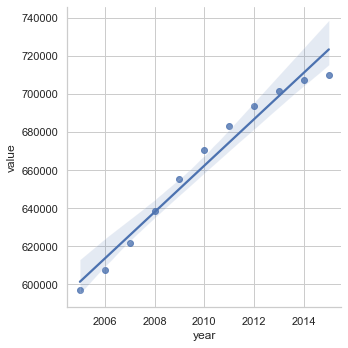

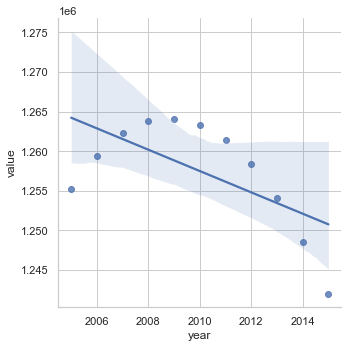

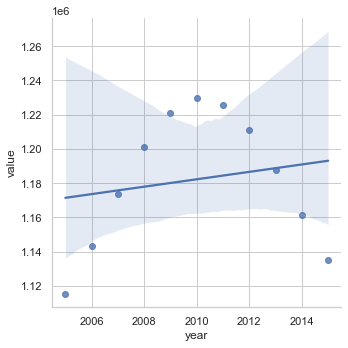

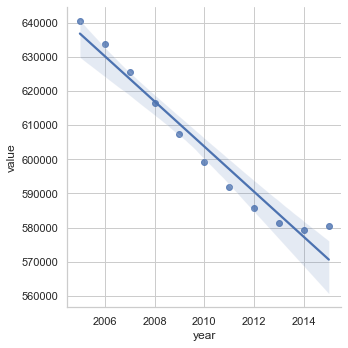

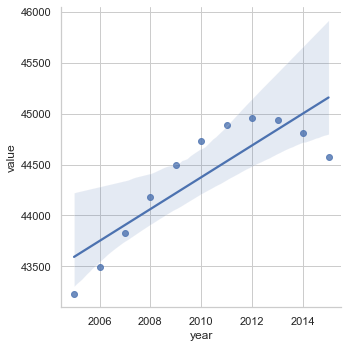

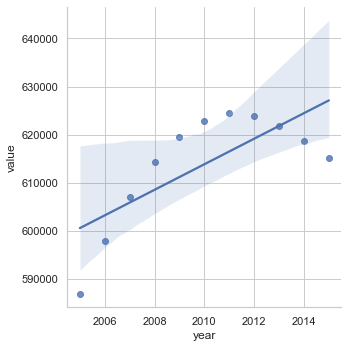

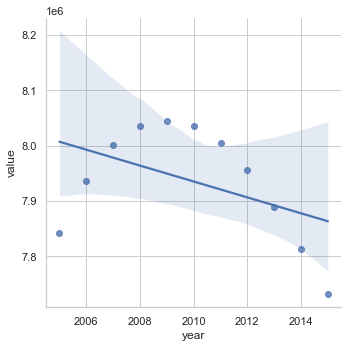

In [56]:
list_top_10_datasets = [row_aus, row_fin, row_nor, row_den, row_bel, row_swe, row_ire, row_ice, row_nze, row_unk]
for dataframe in list_top_10_datasets :
    sns.lmplot(x='year' , y='value', data = formatage(dataframe))
    